<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Reporte-generico" data-toc-modified-id="Reporte-generico-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Reporte generico</a></span><ul class="toc-item"><li><span><a href="#Missing-values" data-toc-modified-id="Missing-values-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Missing values</a></span></li><li><span><a href="#Valores-unicos" data-toc-modified-id="Valores-unicos-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Valores unicos</a></span></li><li><span><a href="#Separacion-variables" data-toc-modified-id="Separacion-variables-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Separacion variables</a></span></li><li><span><a href="#Atipicos-categoricos" data-toc-modified-id="Atipicos-categoricos-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Atipicos categoricos</a></span></li><li><span><a href="#Atipicos-numericos" data-toc-modified-id="Atipicos-numericos-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Atipicos numericos</a></span></li></ul></li><li><span><a href="#EDA" data-toc-modified-id="EDA-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#categoricas" data-toc-modified-id="categoricas-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>categoricas</a></span></li></ul></li><li><span><a href="#Numerico" data-toc-modified-id="Numerico-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Numerico</a></span><ul class="toc-item"><li><span><a href="#histogramas" data-toc-modified-id="histogramas-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>histogramas</a></span></li><li><span><a href="#Scatterplots" data-toc-modified-id="Scatterplots-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Scatterplots</a></span></li><li><span><a href="#Correlaciones" data-toc-modified-id="Correlaciones-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Correlaciones</a></span></li></ul></li></ul></div>

In [ ]:
# Idea plantilla
la idea es ver por encima rapidamente todas 

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



%matplotlib inline
#Automcompletar rápido
%config IPCompleter.greedy=True
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [2]:
#Importacion datos
ruta_proyecto = 'C:/proyectos/weather_ohio/'
nombre_fichero_datos = 'trabajo.csv'

ruta_completa = ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_fichero_datos
df = pd.read_csv(ruta_completa,index_col=0)

# Reporte generico

In [38]:
def report_data(datos):
    df = datos.copy()
    registros = df.shape[0]
    columnas = df.shape[1]
    
    header = f"Dimensiones Dataframe\n{'-' *30}\n"
    print(f"{header}Filas: {registros} \nColumnas: {columnas}")
    
    mean_missing_rate = df.apply(lambda x: round(x.isna().sum()/df.shape[0]*100,2)).mean()
    
    print(f"Missing data: {mean_missing_rate:.3}%")
    
    
report_data(df)

Dimensiones Dataframe
------------------------------
Filas: 8672 
Columnas: 21
Missing data: 15.4%


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8672 entries, 1998-03-26 to 2021-12-31
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AWND             8642 non-null   float64
 1   AWND_ATTRIBUTES  8642 non-null   object 
 2   FMTM             2825 non-null   float64
 3   FMTM_ATTRIBUTES  2825 non-null   object 
 4   PGTM             4822 non-null   float64
 5   PRCP             8667 non-null   float64
 6   PRCP_ATTRIBUTES  8667 non-null   object 
 7   TAVG             2654 non-null   float64
 8   TAVG_ATTRIBUTES  2654 non-null   object 
 9   TMAX             8618 non-null   float64
 10  TMAX_ATTRIBUTES  8618 non-null   object 
 11  TMIN             8616 non-null   float64
 12  TMIN_ATTRIBUTES  8616 non-null   object 
 13  WDF2             8656 non-null   float64
 14  WDF2_ATTRIBUTES  8656 non-null   object 
 15  WDF5             8633 non-null   float64
 16  WDF5_ATTRIBUTES  8633 non-null   object 
 17  WSF2

## Missing values

In [62]:
def missing_rates(df):
    return df.apply(lambda x: round(x.isna().sum()/df.shape[0]*100,2)).sort_values(ascending=False)

print(f"Porcentajes de missing rates por variable\n{'-' *50}")
missing_rates(df)

Porcentajes de missing rates por variable
--------------------------------------------------


TAVG               69.40
TAVG_ATTRIBUTES    69.40
FMTM               67.42
FMTM_ATTRIBUTES    67.42
PGTM               44.40
TMIN_ATTRIBUTES     0.65
TMIN                0.65
TMAX_ATTRIBUTES     0.62
TMAX                0.62
WDF5_ATTRIBUTES     0.45
WDF5                0.45
WSF5                0.42
WSF5_ATTRIBUTES     0.42
AWND_ATTRIBUTES     0.35
AWND                0.35
WDF2                0.18
WDF2_ATTRIBUTES     0.18
WSF2                0.18
WSF2_ATTRIBUTES     0.18
PRCP_ATTRIBUTES     0.06
PRCP                0.06
dtype: float64

## Valores unicos

In [66]:
def columnas_valores_unicos(df):
    x = df.nunique()
    unicos_columns = x[x==1].index.tolist()
    if len(unicos_columns)==0:
        return "No hay columnas con un unico valor"
    return unicos_columns


print(f"Numero Valores unicos por variable\n{'-' *50}")
print(df.nunique().sort_values() )

Numero Valores unicos por variable
--------------------------------------------------
WSF5_ATTRIBUTES       2
AWND_ATTRIBUTES       2
WSF2_ATTRIBUTES       2
FMTM_ATTRIBUTES       2
WDF5_ATTRIBUTES       2
WDF2_ATTRIBUTES       2
TAVG_ATTRIBUTES       2
PRCP_ATTRIBUTES       4
TMIN_ATTRIBUTES       5
TMAX_ATTRIBUTES       5
WDF2                 37
WDF5                 37
WSF2                 45
WSF5                 69
TAVG                 79
TMIN                 88
TMAX                 94
AWND                 96
PRCP                174
FMTM               1040
PGTM               1274
dtype: int64


In [65]:
#columnas valor unico
print(f"Variables con un solo valor unico: \n{'-' *50}")
columnas_valores_unicos(df)

Variables con un solo valor unico: 
--------------------------------------------------


'No hay columnas con un unico valor'

## Separacion variables

In [78]:
cat = df.select_dtypes(exclude = 'number').copy()
num = df.select_dtypes(include='number').copy()

In [89]:
valores_unicos = cat.nunique().sort_values()
lista_cardinalidad_alta = valores_unicos[valores_unicos>15].index.tolist()
lista_cardinalidad_baja = valores_unicos[valores_unicos<15].index.tolist()

print("lista cardinalidad baja"+f"\n{'-'*30}")
print(lista_cardinalidad_baja)
print("\n")

print("lista cardinalidad alta"+f"\n{'-'*30}")
print(lista_cardinalidad_alta)

lista cardinalidad baja
------------------------------
['AWND_ATTRIBUTES', 'FMTM_ATTRIBUTES', 'TAVG_ATTRIBUTES', 'WDF2_ATTRIBUTES', 'WDF5_ATTRIBUTES', 'WSF2_ATTRIBUTES', 'WSF5_ATTRIBUTES', 'PRCP_ATTRIBUTES', 'TMAX_ATTRIBUTES', 'TMIN_ATTRIBUTES']


lista cardinalidad alta
------------------------------
[]


## Atipicos categoricos

In [132]:
registros = cat.shape[1]
for variable in cat:
    print(cat[variable].value_counts(normalize=True)*100 )
    print("-"*20)

,,W   98.13701
,,B    1.86299
Name: AWND_ATTRIBUTES, dtype: float64
--------------------
,,W   94.58407
,,B    5.41593
Name: FMTM_ATTRIBUTES, dtype: float64
--------------------
,,W,2400    83.83524
T,,W,2400   14.39945
,,B,2400     1.54609
T,,B,2400    0.21922
Name: PRCP_ATTRIBUTES, dtype: float64
--------------------
,,W    99.54785
,G,W    0.45215
Name: TAVG_ATTRIBUTES, dtype: float64
--------------------
,,W    98.15502
,,B     1.77535
,,M     0.04641
,S,W    0.01160
,I,W    0.01160
Name: TMAX_ATTRIBUTES, dtype: float64
--------------------
,,W    98.14299
,,B     1.77577
,,M     0.04643
,S,W    0.02321
,I,W    0.01161
Name: TMIN_ATTRIBUTES, dtype: float64
--------------------
,,W   98.23244
,,B    1.76756
Name: WDF2_ATTRIBUTES, dtype: float64
--------------------
,,W   98.22773
,,B    1.77227
Name: WDF5_ATTRIBUTES, dtype: float64
--------------------
,,W   98.23244
,,B    1.76756
Name: WSF2_ATTRIBUTES, dtype: float64
--------------------
,,W   98.22835
,,B    1.77165
Name: WSF5_AT

## Atipicos numericos

In [137]:
def atipicos_desv_tip(variable, num_desv_tip = 4):
    #sacamos los nulos por ahora
    variable = variable.dropna()
    #calculamos los límites
    media = np.mean(variable)
    sd = np.std(variable)
    umbral = sd * num_desv_tip
    lim_inf = media - umbral
    lim_sup = media + umbral
    #encontramos los índices de los que están fuera de los límites
    indices = [indice for indice,valor in variable.items() if valor < lim_inf or valor > lim_sup]
    return(indices)

In [138]:
def conteo_atipicos(df,variable, num_desv_tip = 4):
    atipicos = atipicos_desv_tip(df[variable], num_desv_tip)
    return(df.loc[atipicos,variable].value_counts())

In [140]:
var_atipicos_dt = num.columns.tolist()

for variable in var_atipicos_dt:
    print('\n' + variable + ':\n')
    print(conteo_atipicos(num,variable,num_desv_tip=4))


AWND:

23.04000    2
22.59000    1
22.82000    1
21.70000    1
21.92000    1
Name: AWND, dtype: int64

FMTM:

Series([], Name: FMTM, dtype: int64)

PGTM:

Series([], Name: PGTM, dtype: int64)

PRCP:

1.23000    5
1.15000    5
1.30000    4
1.25000    4
1.24000    3
          ..
1.37000    1
1.41000    1
2.30000    1
1.49000    1
2.28000    1
Name: PRCP, Length: 61, dtype: int64

TAVG:

Series([], Name: TAVG, dtype: int64)

TMAX:

Series([], Name: TMAX, dtype: int64)

TMIN:

Series([], Name: TMIN, dtype: int64)

WDF2:

Series([], Name: WDF2, dtype: int64)

WDF5:

Series([], Name: WDF5, dtype: int64)

WSF2:

44.10000    8
45.00000    5
46.10000    2
47.00000    2
48.10000    1
59.10000    1
Name: WSF2, dtype: int64

WSF5:

61.10000     4
64.00000     2
184.10000    1
68.90000     1
70.90000     1
66.00000     1
79.00000     1
62.00000     1
91.90000     1
Name: WSF5, dtype: int64


# EDA

## categoricas

In [70]:
def frecuencias_cat(df_cat):
    resultado = df_cat.apply(lambda x: x.value_counts(normalize = True)).T.stack()\
                .to_frame().reset_index()\
                .rename(columns={'level_0':'Variable','level_1':'Valor',0: "Frecuencia"})\
                .sort_values(by = ['Variable','Frecuencia'])
    return(resultado)


def graficos_eda_categoricos(cat):
    
    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

In [91]:
frecuencias_cat(df[lista_cardinalidad_baja])

,Variable,Valor,Frecuencia
0,AWND_ATTRIBUTES,",,B",0.018630
1,AWND_ATTRIBUTES,",,W",0.981370
2,FMTM_ATTRIBUTES,",,B",0.054159
3,FMTM_ATTRIBUTES,",,W",0.945841
16,PRCP_ATTRIBUTES,"T,,B,2400",0.002192
14,PRCP_ATTRIBUTES,",,B,2400",0.015461
17,PRCP_ATTRIBUTES,"T,,W,2400",0.143994
15,PRCP_ATTRIBUTES,",,W,2400",0.838352
5,TAVG_ATTRIBUTES,",G,W",0.004521
4,TAVG_ATTRIBUTES,",,W",0.995479


In [149]:
# lista_cardinalidad_baja
# lista_cardinalidad_alta

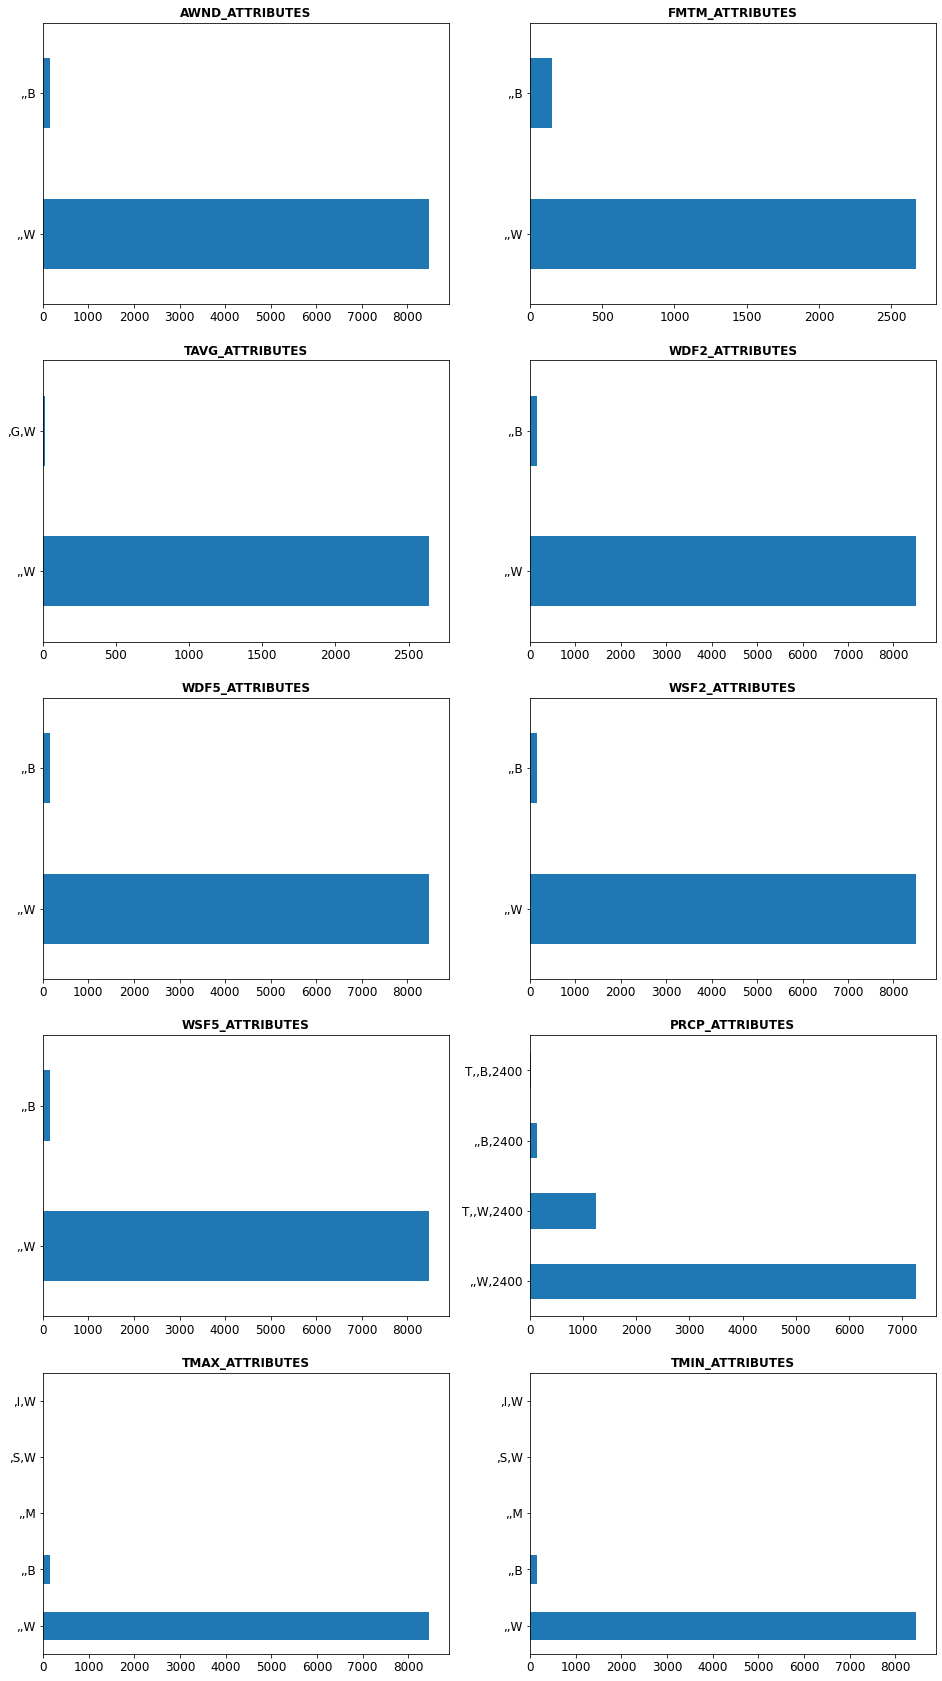

In [90]:
graficos_eda_categoricos(df[lista_cardinalidad_baja])

# Numerico

In [113]:
f"Numero de variables numericas: {len(num.columns)}"


'Numero de variables numericas: 11'

In [148]:
num.describe().T

,count,mean,std,min,25%,50%,75%,max
AWND,8642.00000,7.63203,3.41571,0.00000,5.14000,7.16000,9.62000,23.04000
FMTM,2825.00000,1393.84637,554.06557,2.00000,1151.00000,1432.00000,1710.00000,2359.00000
PGTM,4822.00000,1368.53733,564.36149,0.00000,1123.25000,1427.00000,1706.75000,2359.00000
PRCP,8667.00000,0.10516,0.25543,0.00000,0.00000,0.00000,0.07000,4.12000
TAVG,2654.00000,52.48078,17.77957,0.00000,39.00000,55.00000,68.00000,83.00000
TMAX,8618.00000,61.89615,19.13991,5.00000,47.00000,65.00000,78.00000,98.00000
TMIN,8616.00000,43.68675,16.97365,-10.00000,30.00000,45.00000,58.00000,77.00000
WDF2,8656.00000,213.46476,87.92692,10.00000,170.00000,230.00000,270.00000,360.00000
WDF5,8633.00000,213.86888,87.81364,0.00000,180.00000,230.00000,270.00000,360.00000
WSF2,8656.00000,17.73051,6.34726,0.00000,13.00000,16.10000,21.90000,59.10000


## histogramas


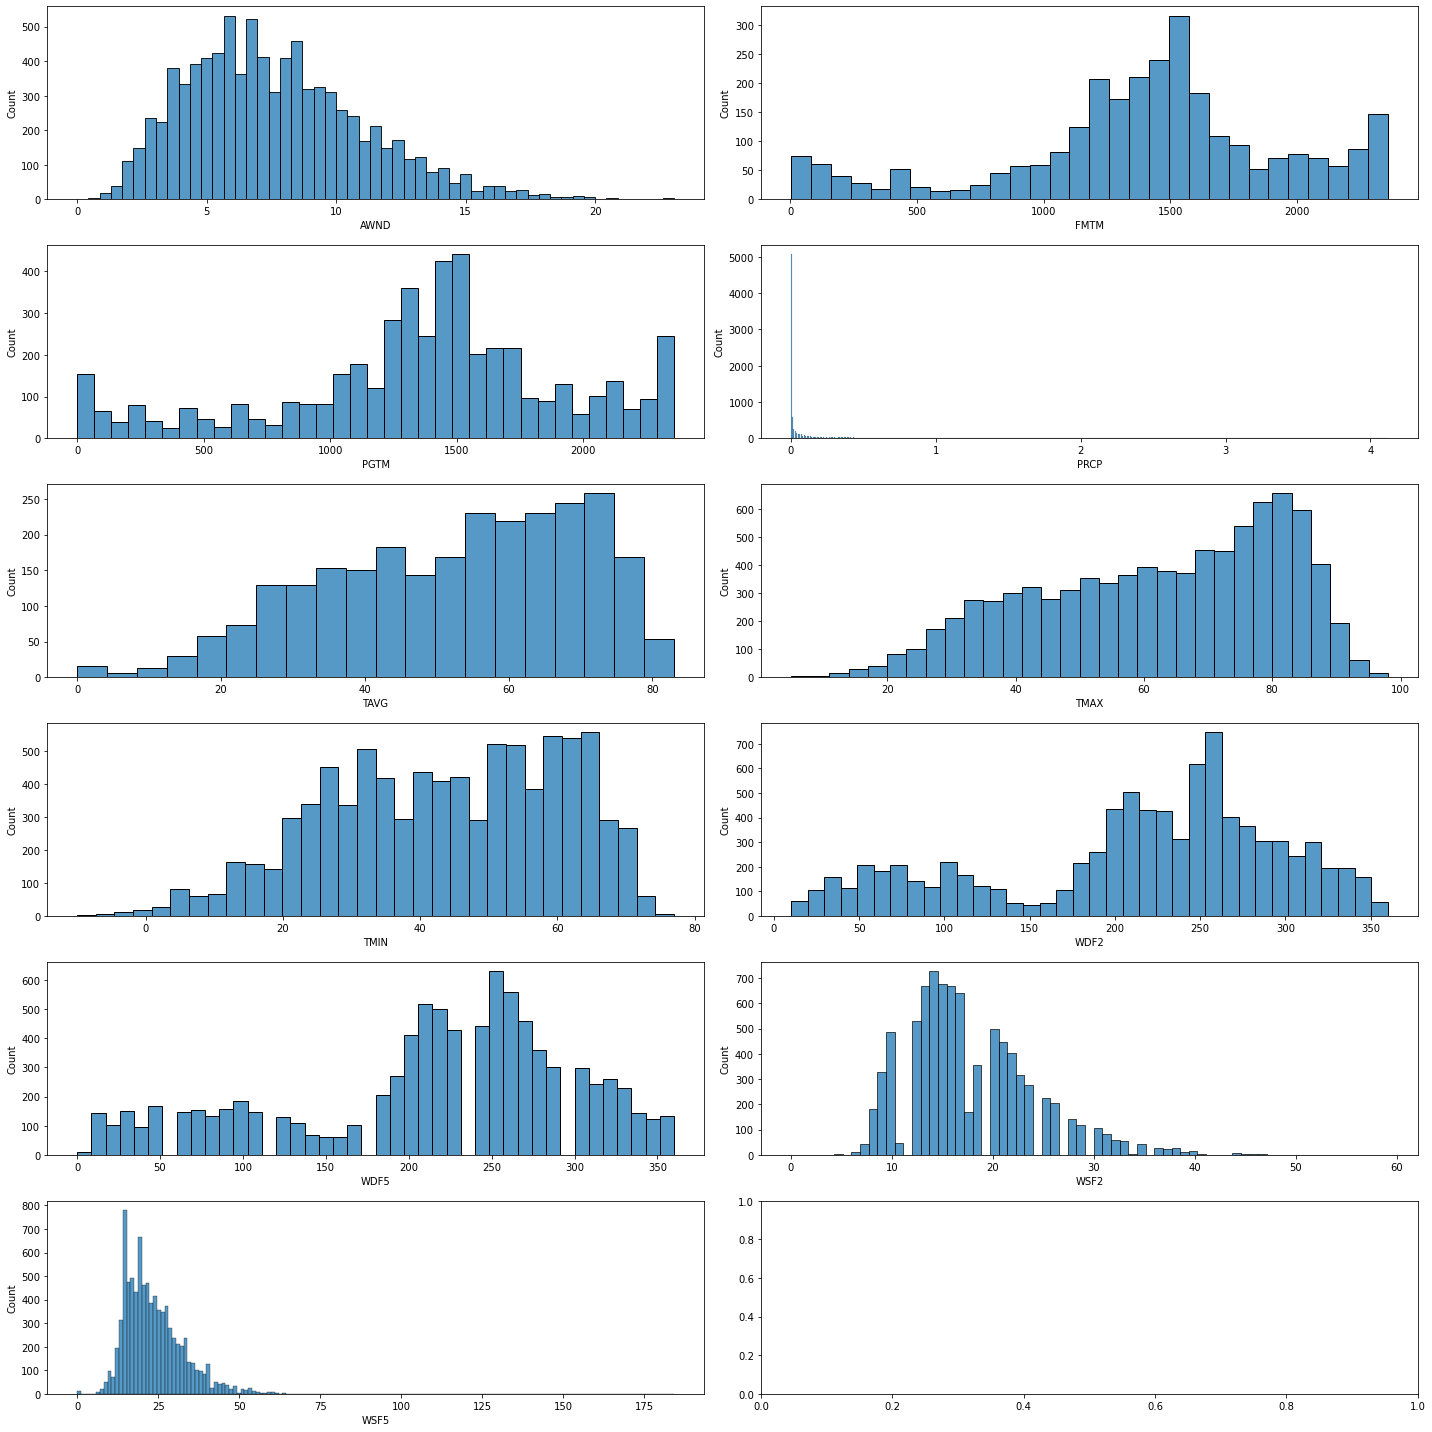

In [112]:
# Histogramas
n_filas = len(num.columns)//2 +1
f, ax = plt.subplots(nrows = n_filas, ncols = 2, figsize=(20,20))

ax = ax.flatten()


for i, col in enumerate(num.columns.tolist()):
    sns.histplot(num[col], ax=ax[i])
plt.tight_layout()    

In [114]:
num.columns

Index(['AWND', 'FMTM', 'PGTM', 'PRCP', 'TAVG', 'TMAX', 'TMIN', 'WDF2', 'WDF5',
       'WSF2', 'WSF5'],
      dtype='object')

## Scatterplots

In [127]:
# relaciones variable 

def multiple_scatterplots(datos: pd.DataFrame,variable: str,variables_numericas:list):
    """ df: dataframe
        variable: str
        variables_numericas: lista
    """
    df = datos.copy()
    variables_numericas = [var for var in variables_numericas if var !=variable]
  
    n_filas = len(variables_numericas)//2 +1
    f, ax = plt.subplots(nrows = n_filas, ncols = 2, figsize=(20,20))

    ax = ax.flatten()


    for i, col in enumerate(variables_numericas):
        sns.scatterplot(data= df, x=col,y=variable, ax=ax[i])
    plt.tight_layout()  

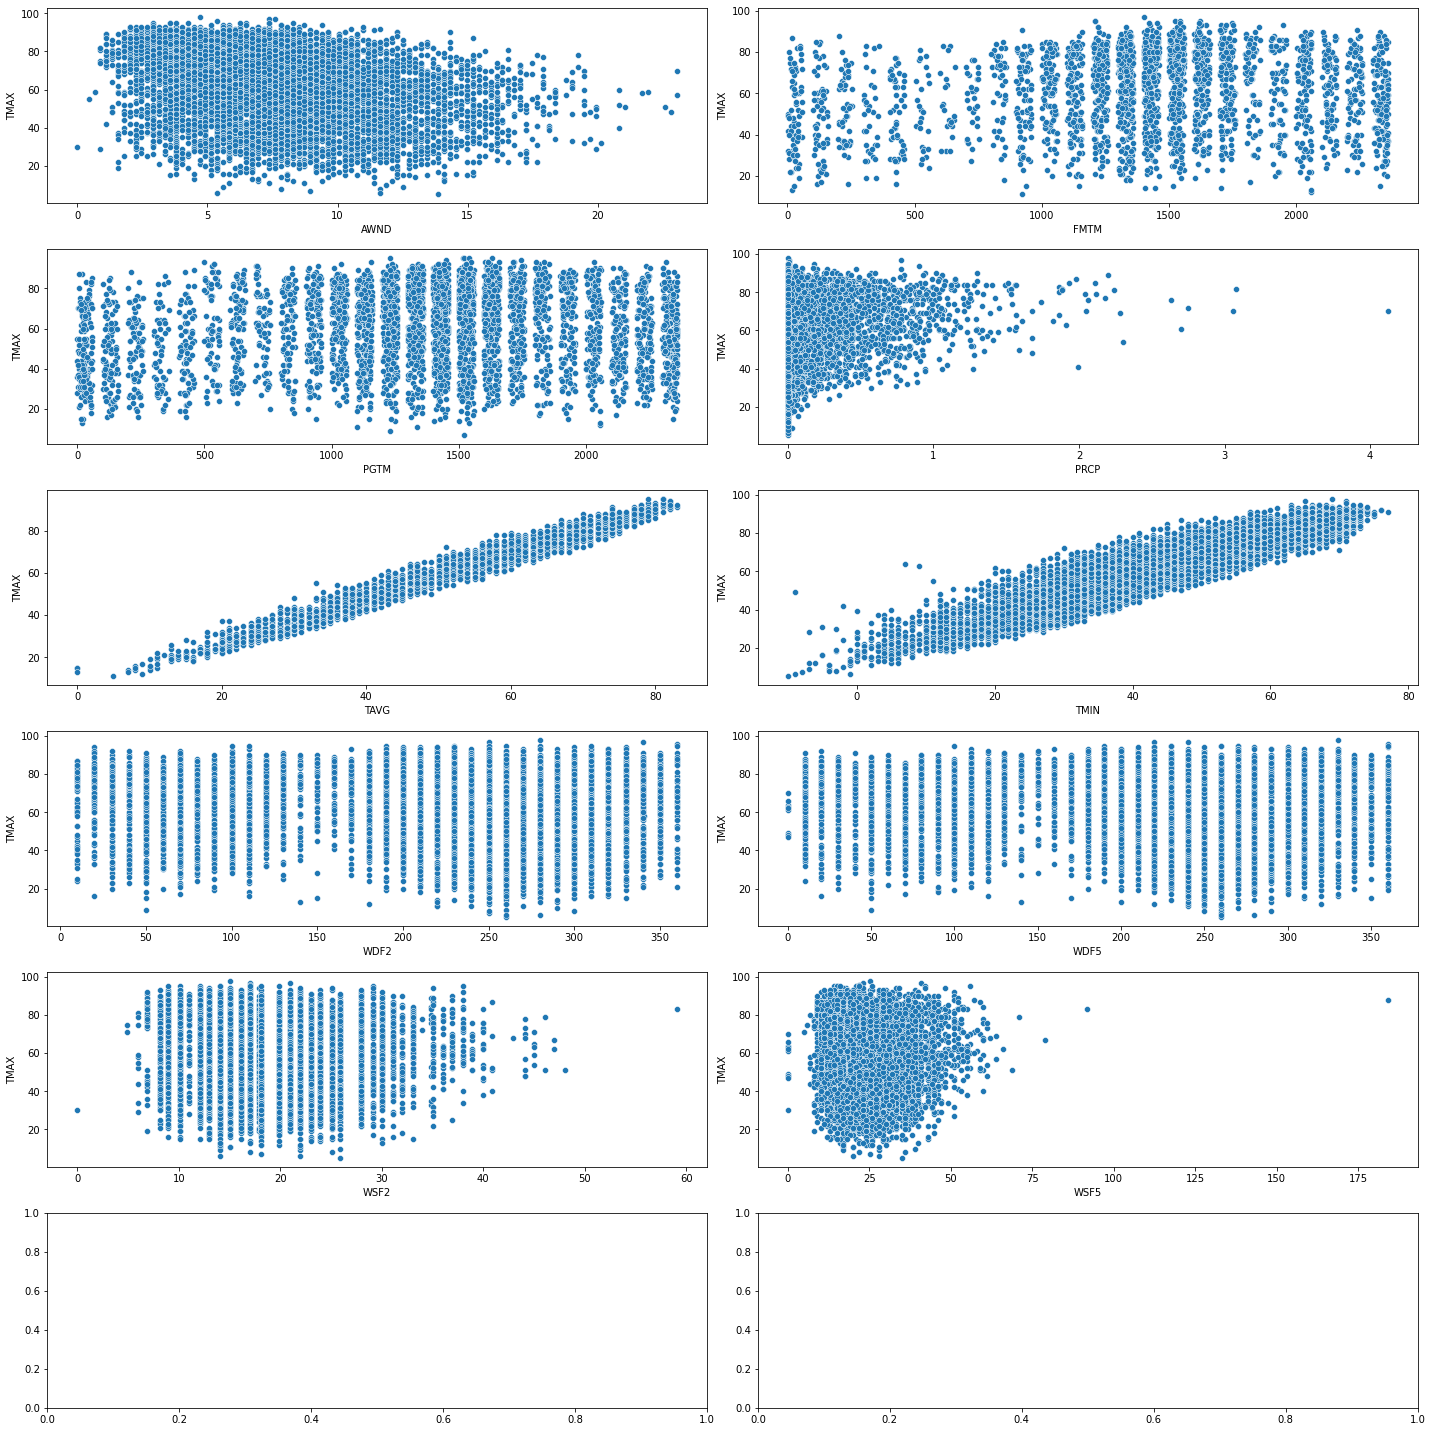

In [126]:
variable = 'TMAX'
variables_numericas = num.columns
multiple_scatterplots(datos=df ,variable = variable, variables_numericas=variables_numericas)

## Correlaciones

In [144]:
def correlaciones_fuertes(df, lim_inf = 0.3, lim_sup = 1,drop_dupli=True):
    #Calcula la matriz de correlación
    c = df.corr().abs()
    #Lo pasa todo a filas
    c= c.unstack()
    #Pasa el índice a columnas y le pone nombres
    c = pd.DataFrame(c).reset_index()
    c.columns = ['var1','var2','corr']
    #A dataframe, filtra limites y ordena en descendiente
    c = c.loc[(c['corr'] > lim_inf) &  (c['corr'] < lim_sup),:].sort_values(by = 'corr', ascending=False)
    #Desduplica las correlaciones (o no si drop_dupli es False)
    c = c if drop_dupli == False else c.drop_duplicates(subset = ['corr'])
    #Devuelve la salida
    return(c)

In [146]:
cor_finales = correlaciones_fuertes(df)
cor_finales.var1.value_counts()

TMAX    2
TMIN    2
AWND    2
WSF5    1
PGTM    1
WDF2    1
Name: var1, dtype: int64

In [147]:
cor_finales

,var1,var2,corr
59,TMAX,TAVG,0.98370
70,TMIN,TAVG,0.97913
119,WSF5,WSF2,0.93272
71,TMIN,TMAX,0.92748
23,PGTM,FMTM,0.81719
9,AWND,WSF2,0.81233
85,WDF2,WDF5,0.76970
10,AWND,WSF5,0.75732
55,TMAX,AWND,0.32099
